#  import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression


# load data 

In [2]:
data = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test_data= pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Data Exploration 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [5]:
data.duplicated().sum()

0

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [7]:
pd.DataFrame(data.isna().sum()/len(data) * 100)

,0
id,0.0
CustomerId,0.0
Surname,0.0
CreditScore,0.0
Geography,0.0
Gender,0.0
Age,0.0
Tenure,0.0
Balance,0.0
NumOfProducts,0.0


**so there is no missing** 

In [8]:
X = data.drop('Exited', axis=1)
y = data['Exited']

**split our Data** 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Visualization

In [10]:
train_set = pd.concat([X_train,y_train],axis=1)
train_set.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
149380,149380,15780088,Yobachukwu,679,France,Male,41.0,9,0.00,2,1.0,1.0,103560.98,0
164766,164766,15679760,Slattery,721,France,Male,46.0,9,115764.32,2,1.0,0.0,102950.79,0
155569,155569,15637678,Ma,551,France,Male,35.0,5,0.00,1,1.0,0.0,155394.52,0
124304,124304,15728693,Galkin,743,Spain,Female,31.0,3,57866.03,2,1.0,1.0,107428.42,0
108008,108008,15613673,Lung,675,France,Male,28.0,2,0.00,2,1.0,0.0,134110.93,0


In [11]:
num = [i for i in train_set.columns if train_set[i].dtype != 'object']
print(num)


['id', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']


<Axes: >

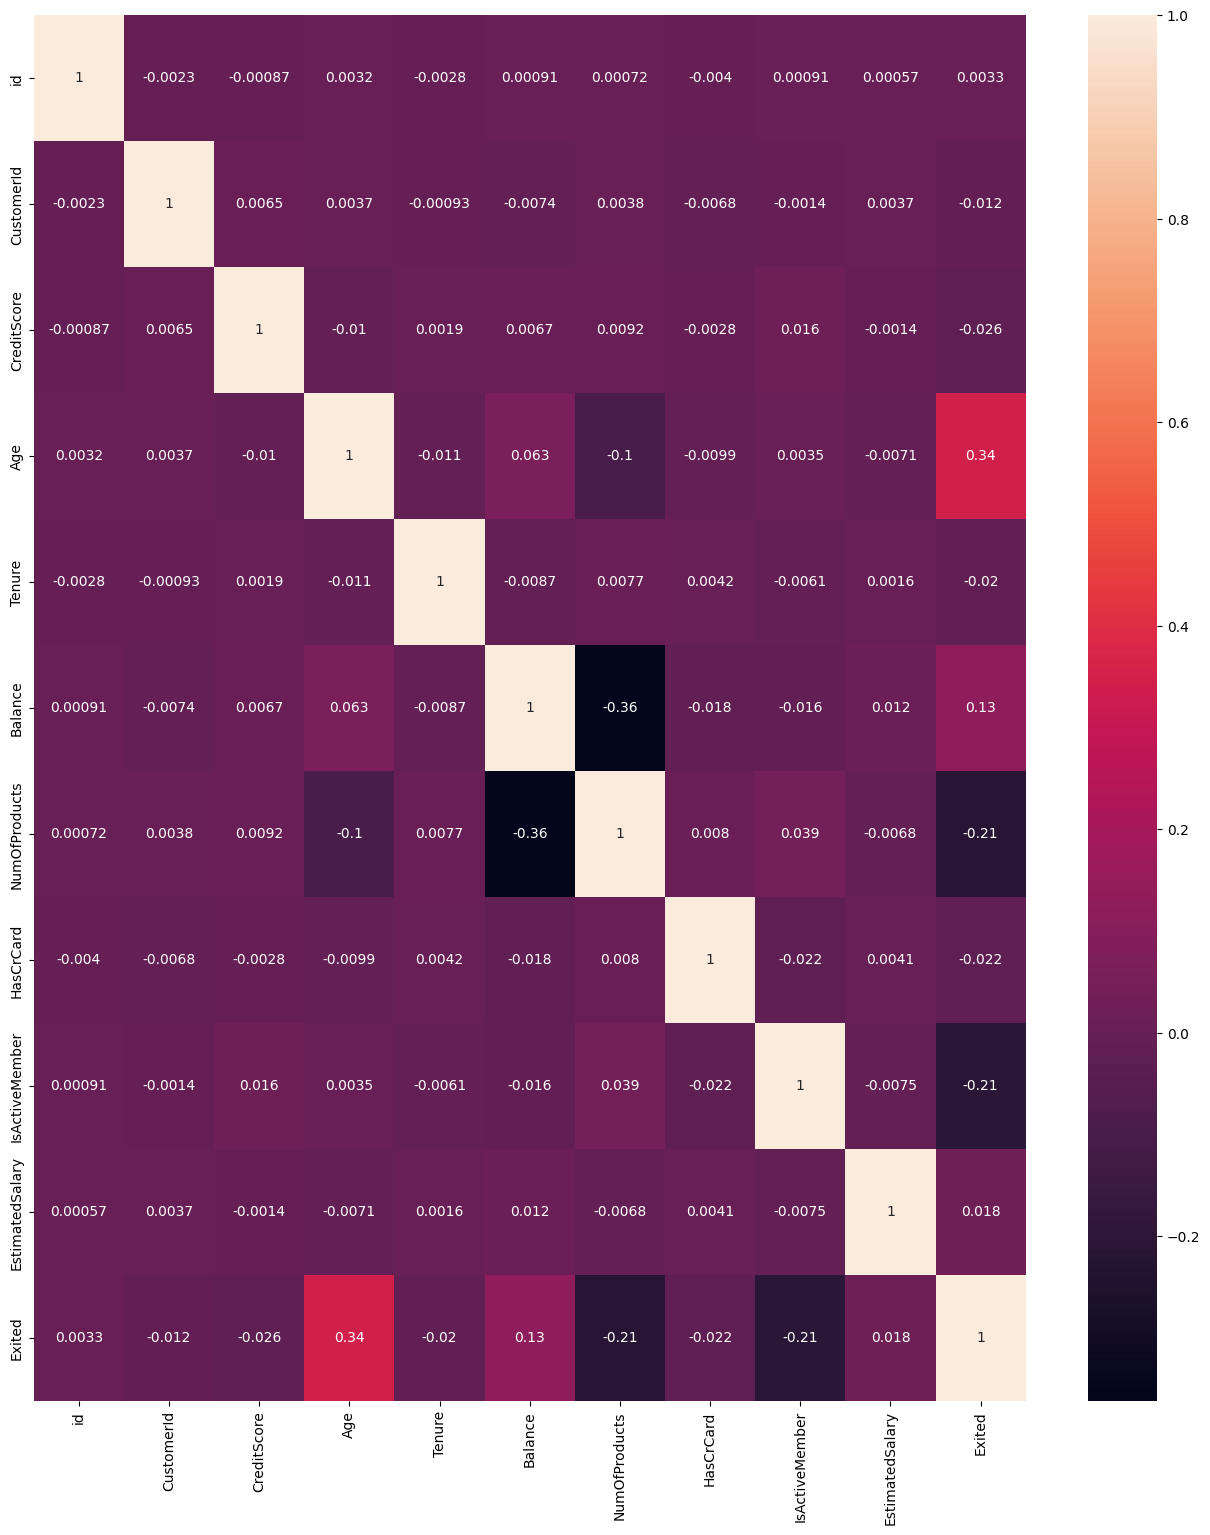

In [12]:
plt.figure(figsize=(16, 18))
sns.heatmap(train_set[num].corr(), annot=True)

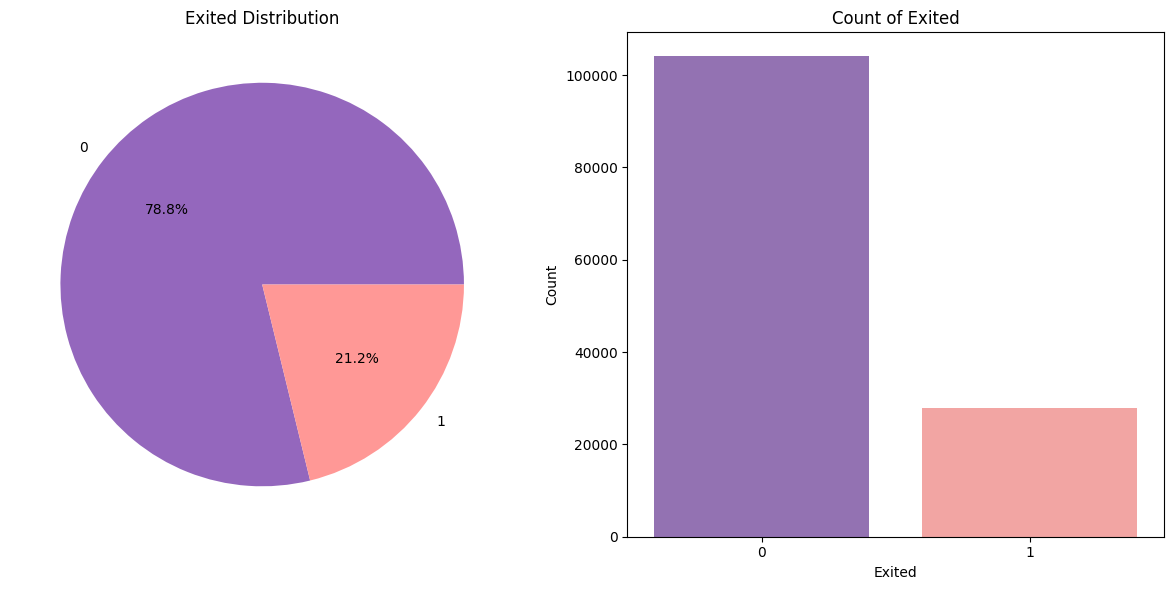

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
# Plotting pie chart
train_set['Exited'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#9467bd', '#ff9896'], ax=axs[0])
axs[0].set_title('Exited Distribution')
axs[0].set_ylabel('')

# Plotting count plot
sns.countplot(x='Exited', data=train_set,palette=['#9467bd', '#ff9896'], ax=axs[1])
axs[1].set_title('Count of Exited')
axs[1].set_xlabel('Exited')
axs[1].set_ylabel('Count')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

21.2% are exited 
78.8% not exited 
it seems that our data not balance

lets see skewiness

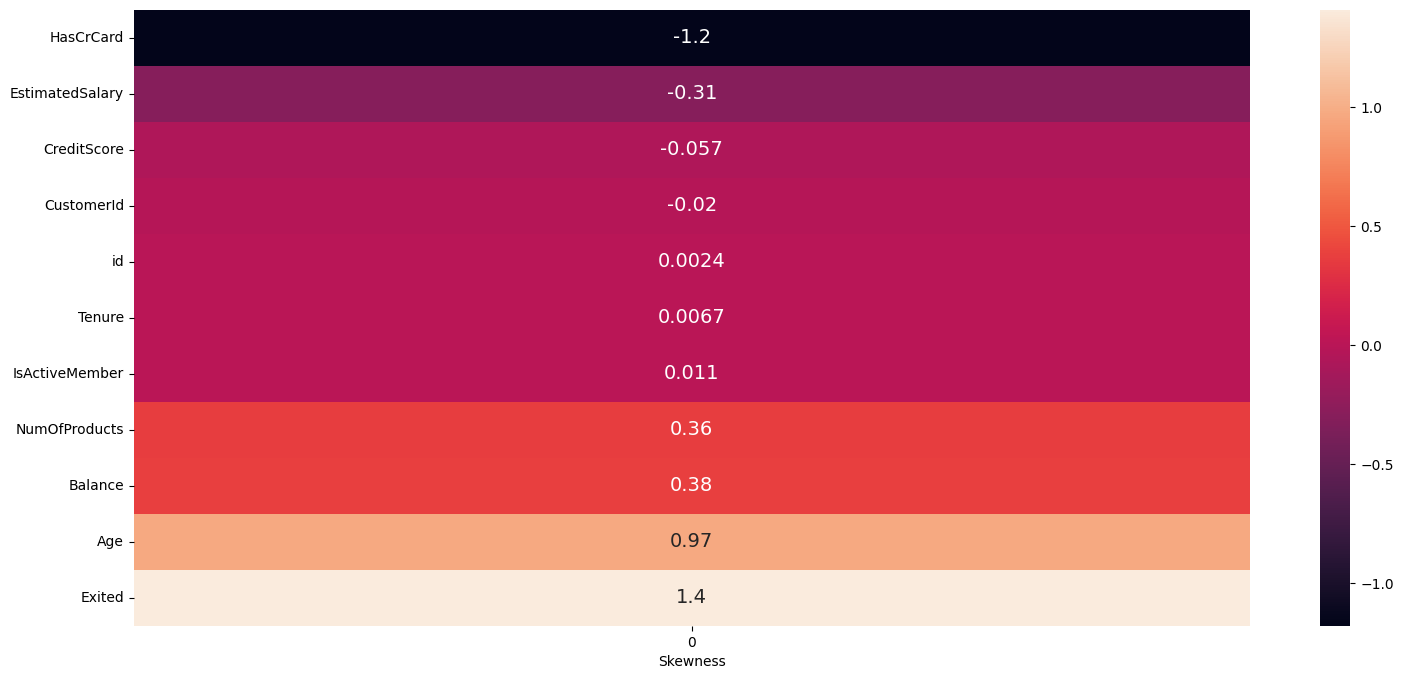

In [14]:
plt.figure(figsize=(18, 8))

sns.heatmap(pd.DataFrame(train_set[num].skew().sort_values(ascending=True)),annot=True,cbar=True,
           annot_kws={'fontsize': 14})
plt.xlabel('Skewness')

plt.show()

In [15]:
def plots_num_column(feature, df):
    """
    A function to plot KDE plot, boxplot of a numerical feature in a dataframe.

    """
    kde_color = '#9467bd'  
    box_color = '#ff9896'  
    
    plt.figure(figsize=(15, 4))
    
   
    plt.subplot(1, 2, 1)
    plt.title('KDE Plot', fontsize=15)
    sns.kdeplot(df[feature], fill=True, color=kde_color)
    

    plt.subplot(1, 2, 2)
    plt.title('Boxplot', fontsize=15)
    sns.boxplot(x=df[feature], palette=[box_color])
    
    plt.tight_layout()
    plt.show()



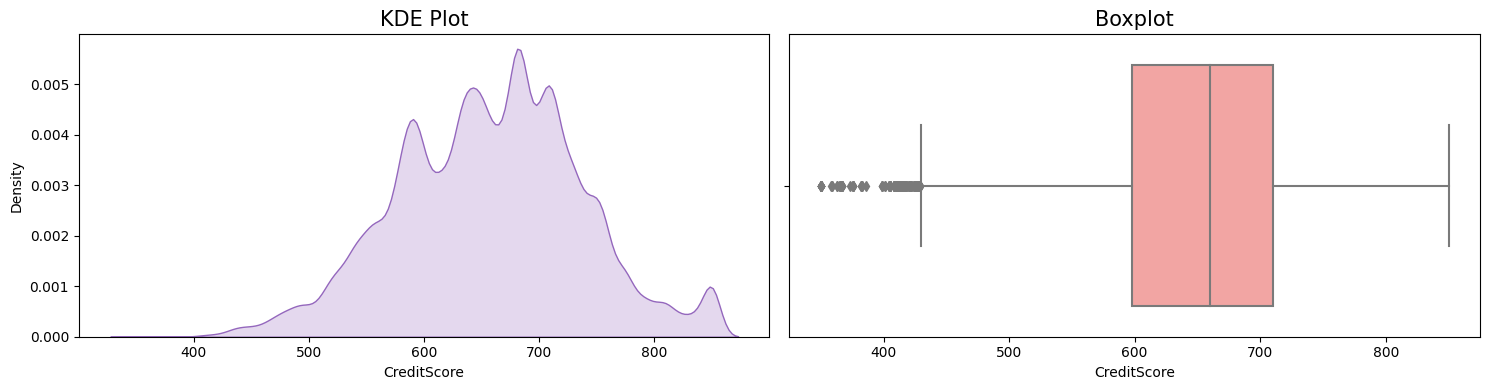

In [16]:
plots_num_column('CreditScore',train_set)

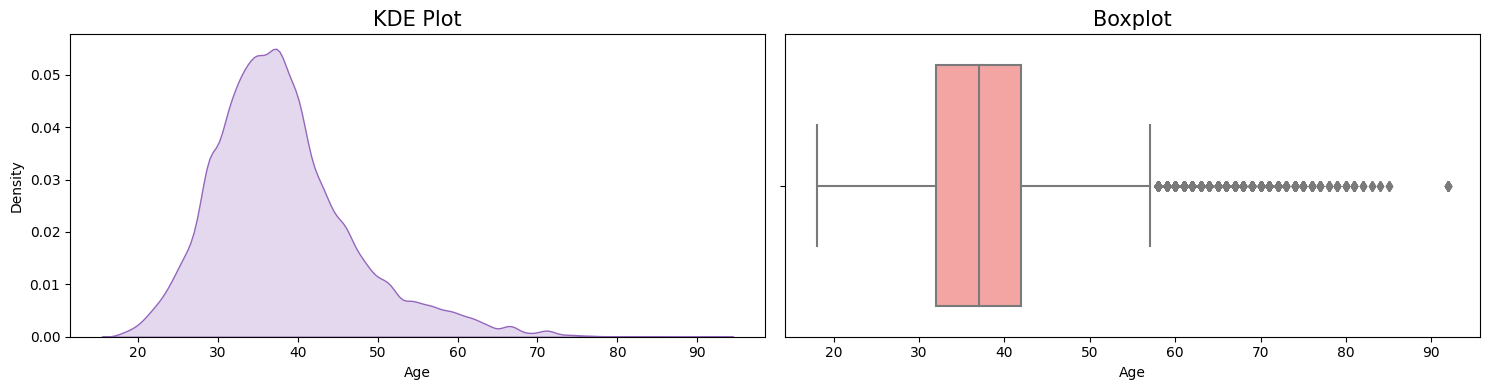

In [17]:
plots_num_column('Age',train_set)

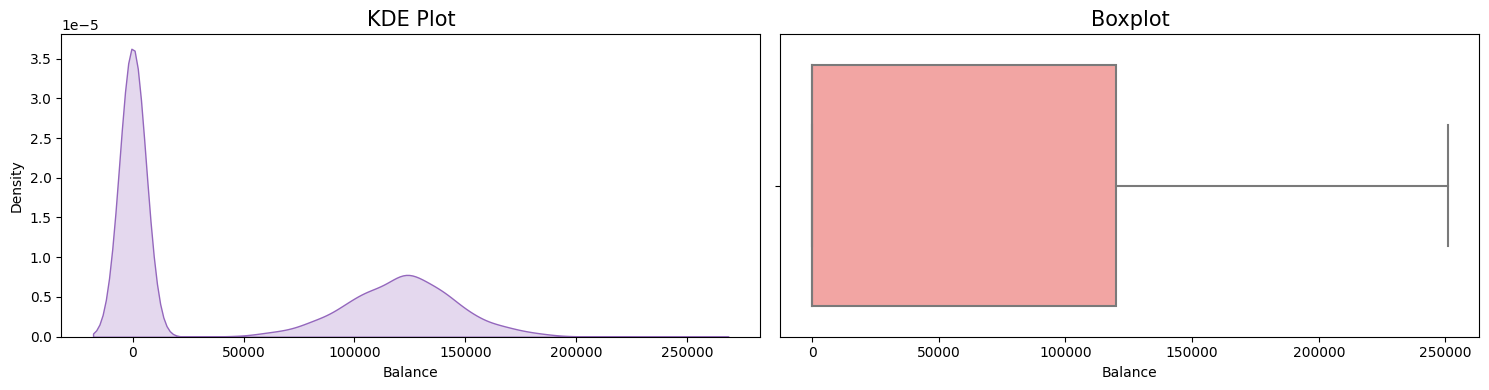

In [18]:
plots_num_column('Balance',train_set)

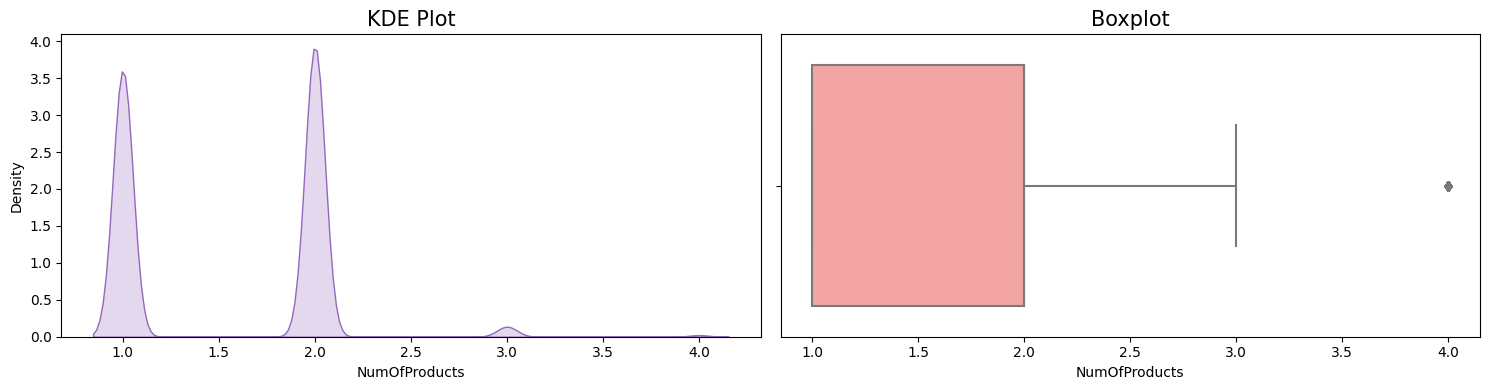

In [19]:
plots_num_column('NumOfProducts',train_set)

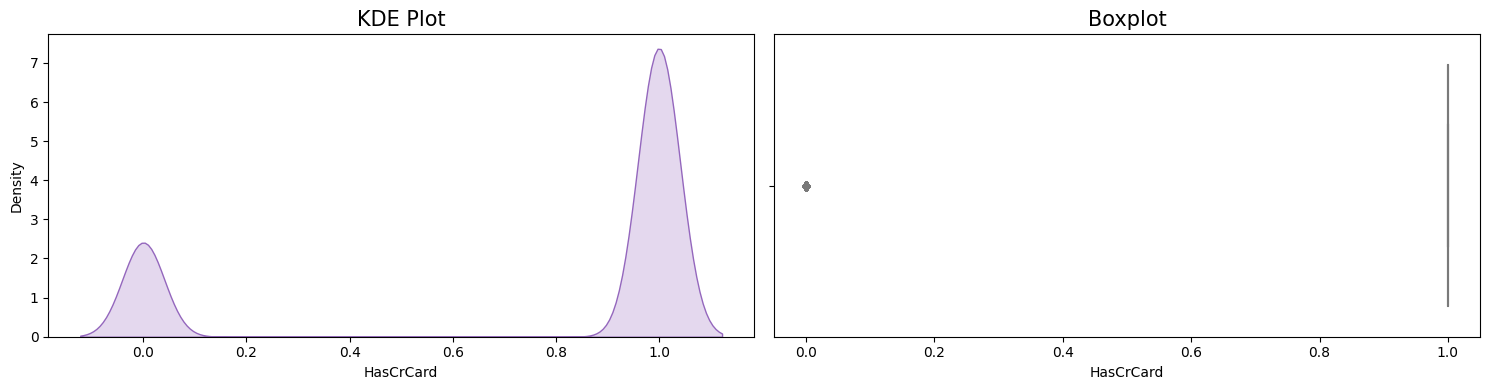

In [20]:
plots_num_column('HasCrCard',train_set)

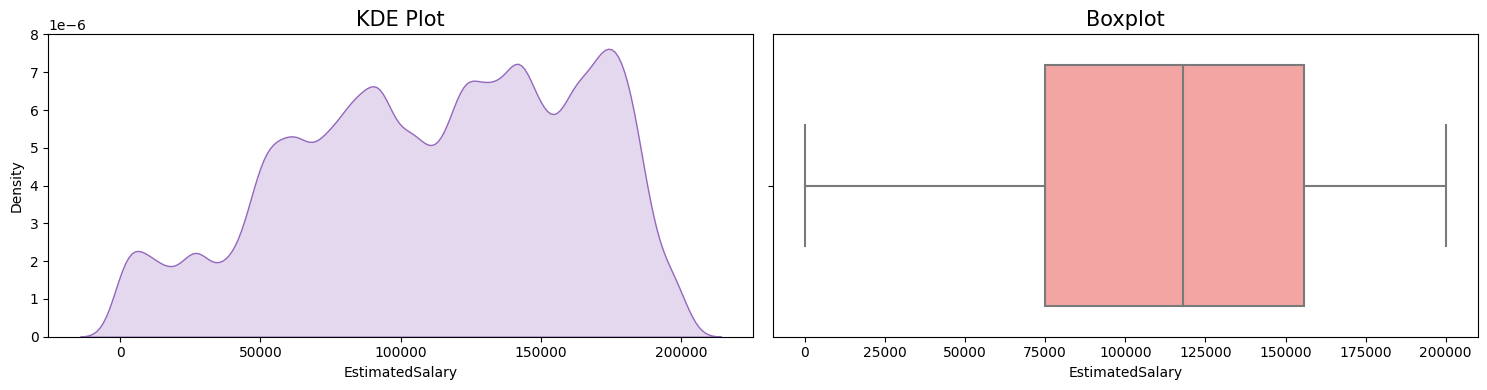

In [21]:
plots_num_column('EstimatedSalary',train_set)

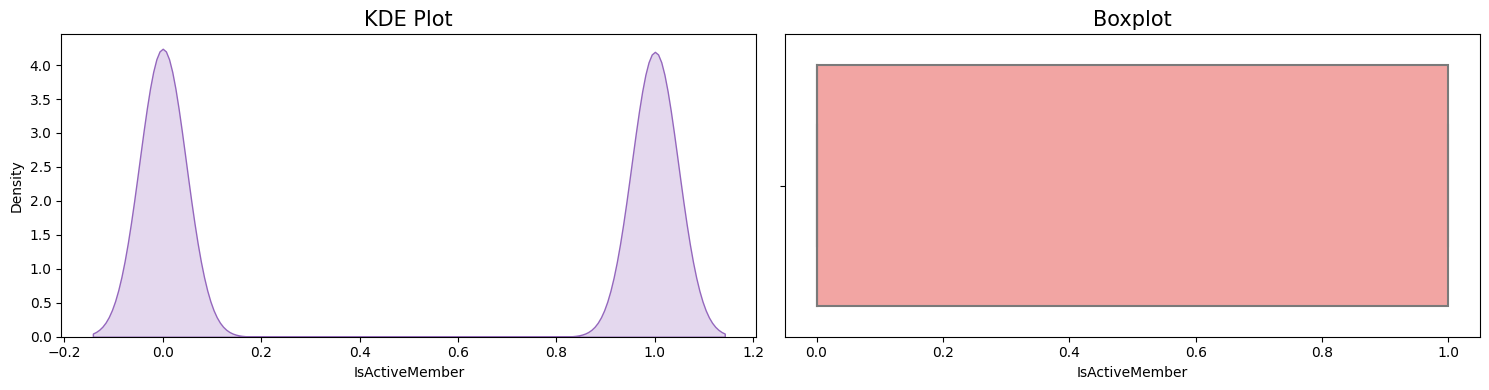

In [22]:
plots_num_column('IsActiveMember',train_set)

In [23]:
def plot_box_and_hist(data, column_name, palette=['#9467bd', '#ff9896']):
    """
    A function to plot box plot and histogram of a numerical feature with respect to the 'Exited' column

    """
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    sns.boxplot(x=data["Exited"].map({0: "Not Exited", 1: "Exited"}), y=column_name, data=data, palette=palette)
    plt.title(f"Box Plot of {column_name} Exited")

    plt.subplot(1, 2, 2)
    sns.histplot(data=data, x=column_name, hue=data["Exited"].map({0: "Not Exited", 1: "Exited"}), palette=palette, kde=True)
    plt.title(f"Histogram of {column_name} Exited")

    plt.tight_layout()
    plt.show()


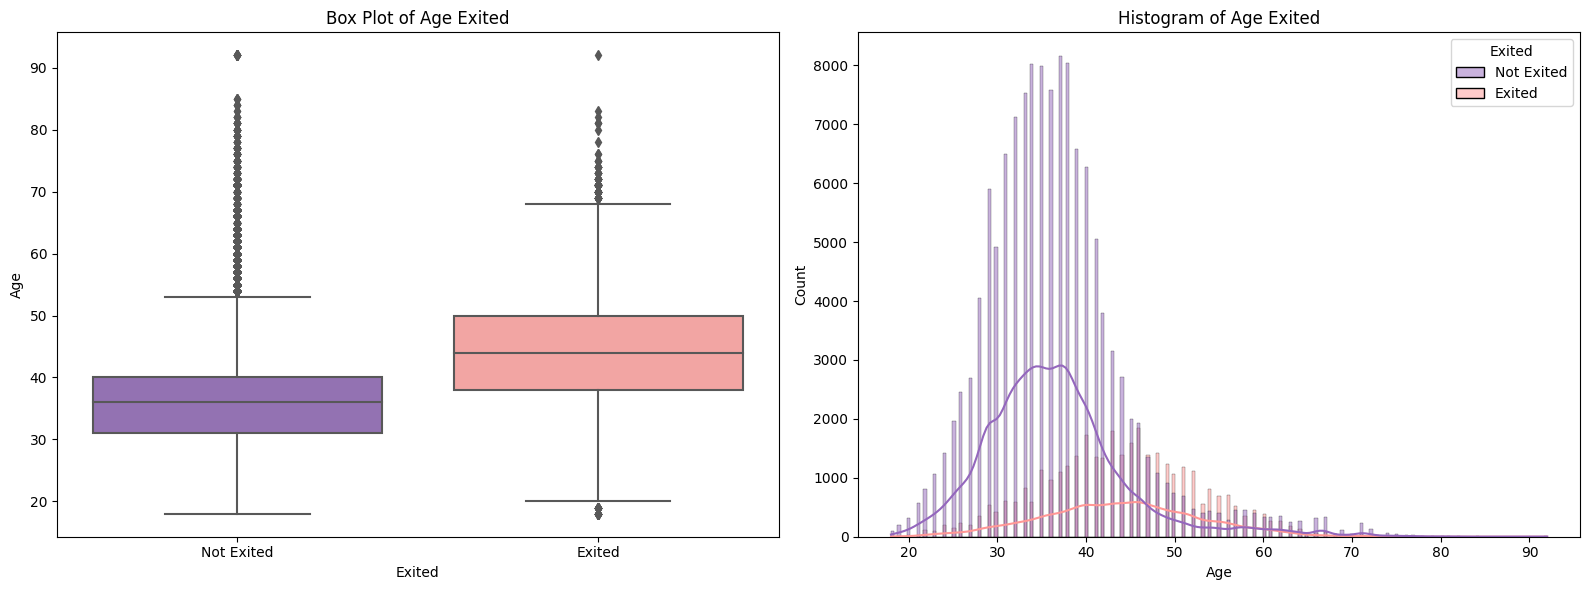

In [24]:
plot_box_and_hist(data,"Age") 

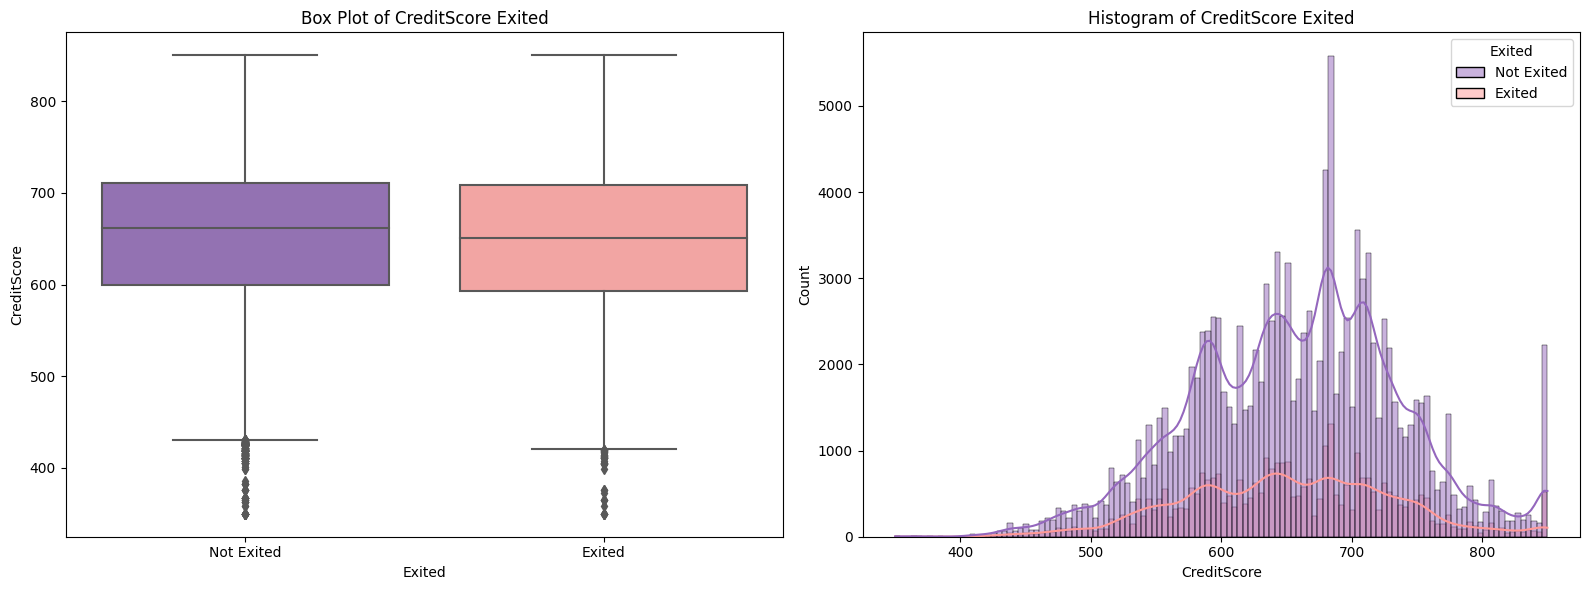

In [25]:
plot_box_and_hist(data,"CreditScore") 

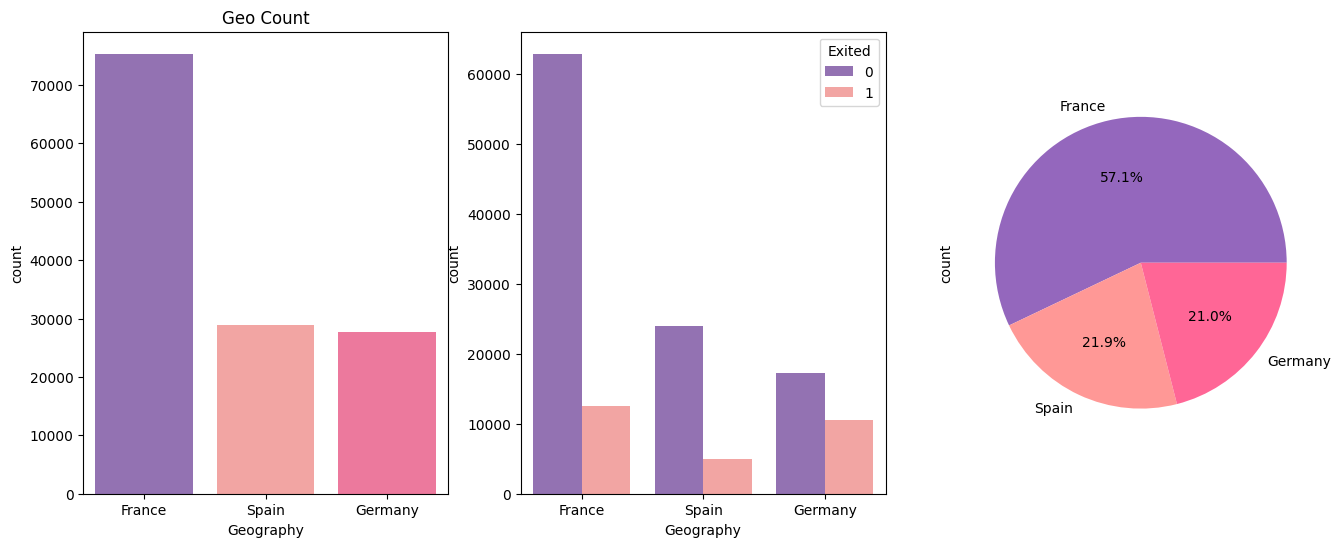

In [26]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 3, 1)
sns.countplot(x=train_set['Geography'],palette=['#9467bd', '#ff9896','#ff6696'])
color_palette=['#9467bd', '#ff9896','#ff6696']
plt.title('Geo Count')

plt.subplot(1, 3, 2)
sns.countplot(x=train_set['Geography'], hue=train_set['Exited'],palette=['#9467bd', '#ff9896','#ff6696'])

plt.subplot(1, 3, 3)
train_set['Geography'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=sns.color_palette(color_palette))
plt.show()


most of people from france and not exited

# preprocessing

In [27]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [28]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])


model = imbpipeline(steps=[
    ('preprocessor', preprocessor),
    ('oversample', RandomOverSampler()),
    ('classifier', XGBClassifier())
])


# fine-tuning

In [29]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.1, 0.01, 0.05]
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Evaluate Model
y_pred = grid_search.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8217044869270155

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.83      0.88     26052
           1       0.55      0.79      0.65      6955

    accuracy                           0.82     33007
   macro avg       0.75      0.81      0.77     33007
weighted avg       0.86      0.82      0.83     33007


Confusion Matrix:
 [[21651  4401]
 [ 1484  5471]]


**Plot ROC curve**

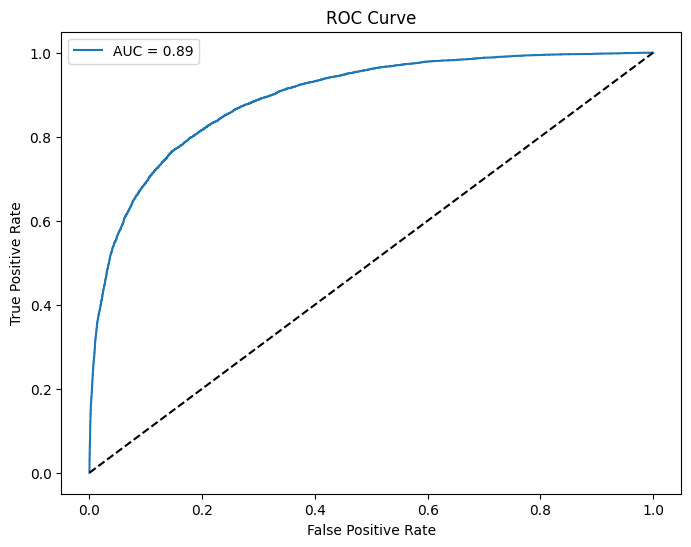

In [30]:
fpr, tpr, thresholds = roc_curve(y_test, grid_search.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, grid_search.predict_proba(X_test)[:, 1]):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


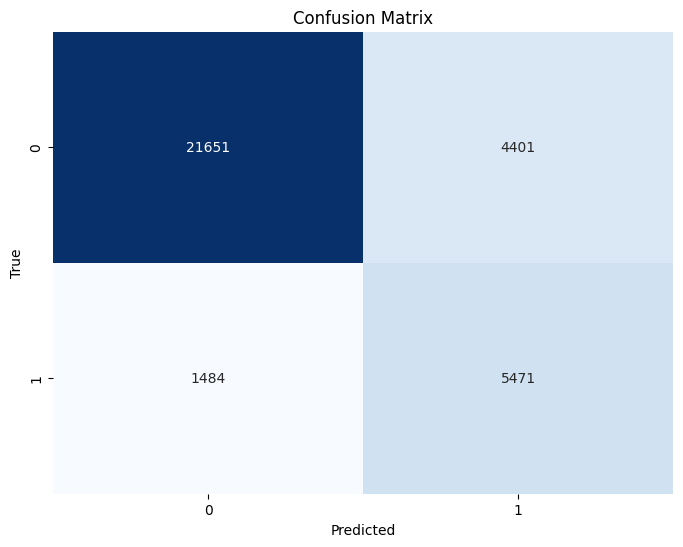

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [32]:
test_predictions = grid_search.predict(test_data)
submission_df = pd.DataFrame({'id': test_data['id'], 'Exited':test_predictions})
submission_df.to_csv('submission44.csv', index=False)